### Loading Necessary Libraries

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from tqdm import tqdm


### GPU Config

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


### Mount Dataset Path

In [3]:
dataset_path = 'T:/CodeBase/Python/Computer Vision/MID/A1/Animals'

### Labels

In [4]:
categories = os.listdir(dataset_path)
print(categories)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


### Data Preprocessing
1. Loading dataset
2. Converting color images to GREY-SCALE images

In [5]:
data = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = categories.index(category)
    
    for img_name in tqdm(os.listdir(category_path), desc=f"Loading {category}"):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
        if img is not None:
            img = cv2.resize(img, (128,128))
            data.append([img, label])

print(f"Total images loaded: {len(data)}")

Loading Tiger: 100%|██████████| 39/39 [00:00<00:00, 190.52it/s]

Total images loaded: 170


### Img Shuffle

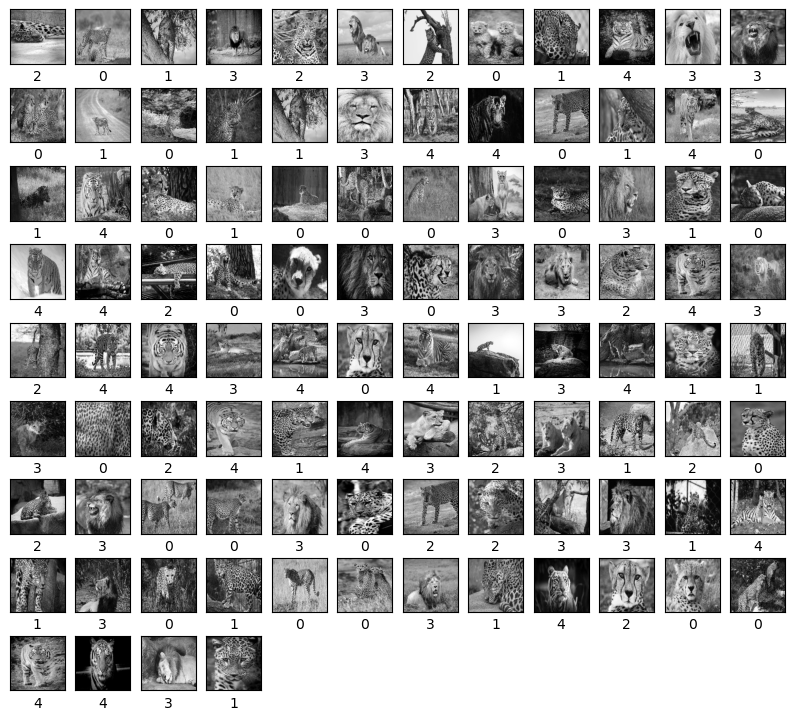

In [6]:
random.shuffle(data)
plt.figure(figsize=(10,10))
i=0
for r in range(10):
  for c in range(10):
    plt.subplot(10,12,i+1)
    plt.imshow(data[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(data[i][1])
    i+=1
plt.show()

### Euclidean Distance

In [7]:
def euclideanDis(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

### 5 Fold Validation

In [8]:
f1=data[0:34]
f2=data[34:68]
f3=data[68:102]
f4=data[102:136]
f5=data[136:170]

In [9]:
folds = [f1,f2,f3,f4,f5]

## KNN Classifier Algorithm
1. Implementing KNN algorithm based on euclidean distance (L2)
2. Calculating Euclidean distances 
3. training the img dataset to this model
 

In [10]:
def knn_classify(test_image, train_set, K):
    distances = []
    for train_img, train_label in train_set:
        dist = euclideanDis(test_image, train_img)
        distances.append((dist, train_label))
    
    distances.sort(key=lambda x: x[0]) 
    k_nearest_labels = [label for _, label in distances[:K]]
    
    return max(set(k_nearest_labels), key=k_nearest_labels.count)

### Performing 5 cross validation
1. Calculating accuracy for each K value
2. Calculating Average accuracy for each K Value

In [11]:
K_values = range(1,31)
foldAccuracies = []
avgAccuracy = []

for K in K_values:
    foldAccuracy = []
    for i in range(5):
        validation_set = folds[i]
        training_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
        correct = 0
        for val_img, val_label in tqdm(validation_set, desc=f"K={K},Fold={i+1}"):
            prediction = knn_classify(val_img, training_set, K)
            if prediction == val_label:
                correct += 1
        
        foldAccuracy.append(correct / len(validation_set) * 100)
    
    foldAccuracies.append(foldAccuracy)
    avgAccuracy.append(np.mean(foldAccuracy))
    
    print(f"Accuracy for K={K}:")
    for fold_idx, accuracy in enumerate(foldAccuracy):
        print(f"  Fold {fold_idx+1} Accuracy: {accuracy:.2f}%")
    print(f"  Average Accuracy: {np.mean(foldAccuracy):.2f}%\n")


K=1,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 187.24it/s]


Accuracy for K=1:
  Fold 1 Accuracy: 29.41%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 44.12%
  Fold 5 Accuracy: 26.47%
  Average Accuracy: 28.24%



K=2,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 186.67it/s]


Accuracy for K=2:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 11.76%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 26.47%
  Average Accuracy: 22.35%



K=3,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 184.66it/s]


Accuracy for K=3:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 26.47%
  Fold 3 Accuracy: 29.41%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 26.47%
  Average Accuracy: 24.71%



K=4,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 174.23it/s]


Accuracy for K=4:
  Fold 1 Accuracy: 14.71%
  Fold 2 Accuracy: 29.41%
  Fold 3 Accuracy: 32.35%
  Fold 4 Accuracy: 20.59%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 21.18%



K=5,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 178.78it/s]


Accuracy for K=5:
  Fold 1 Accuracy: 11.76%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 35.29%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 21.76%



K=6,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 183.94it/s]


Accuracy for K=6:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 29.41%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 17.65%
  Average Accuracy: 23.53%



K=7,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 184.65it/s]


Accuracy for K=7:
  Fold 1 Accuracy: 14.71%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 41.18%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 23.53%
  Average Accuracy: 26.47%



K=8,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 183.86it/s]


Accuracy for K=8:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 32.35%
  Fold 4 Accuracy: 38.24%
  Fold 5 Accuracy: 20.59%
  Average Accuracy: 25.88%



K=9,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 157.32it/s]


Accuracy for K=9:
  Fold 1 Accuracy: 11.76%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 21.18%



K=10,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 179.78it/s]


Accuracy for K=10:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 22.35%



K=11,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 182.31it/s]


Accuracy for K=11:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 14.71%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 18.82%



K=12,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 186.88it/s]


Accuracy for K=12:
  Fold 1 Accuracy: 11.76%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 20.00%



K=13,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 181.72it/s]


Accuracy for K=13:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 29.41%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 22.35%



K=14,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 187.72it/s]


Accuracy for K=14:
  Fold 1 Accuracy: 14.71%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 22.35%



K=15,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 181.67it/s]


Accuracy for K=15:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 17.65%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 20.59%



K=16,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 182.42it/s]


Accuracy for K=16:
  Fold 1 Accuracy: 17.65%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 20.59%



K=17,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 181.67it/s]


Accuracy for K=17:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 29.41%
  Fold 4 Accuracy: 26.47%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 21.18%



K=18,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 183.68it/s]


Accuracy for K=18:
  Fold 1 Accuracy: 14.71%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 20.59%



K=19,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 177.72it/s]


Accuracy for K=19:
  Fold 1 Accuracy: 14.71%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 20.00%



K=20,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 178.00it/s]


Accuracy for K=20:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 21.76%



K=21,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 165.16it/s]


Accuracy for K=21:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 29.41%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 22.35%



K=22,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 182.68it/s]


Accuracy for K=22:
  Fold 1 Accuracy: 23.53%
  Fold 2 Accuracy: 14.71%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 38.24%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 23.53%



K=23,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 176.95it/s]


Accuracy for K=23:
  Fold 1 Accuracy: 23.53%
  Fold 2 Accuracy: 11.76%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 38.24%
  Fold 5 Accuracy: 14.71%
  Average Accuracy: 22.35%



K=24,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 185.69it/s]


Accuracy for K=24:
  Fold 1 Accuracy: 23.53%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 32.35%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 21.76%



K=25,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 187.72it/s]


Accuracy for K=25:
  Fold 1 Accuracy: 23.53%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 17.65%
  Fold 4 Accuracy: 29.41%
  Fold 5 Accuracy: 8.82%
  Average Accuracy: 19.41%



K=26,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 185.66it/s]


Accuracy for K=26:
  Fold 1 Accuracy: 23.53%
  Fold 2 Accuracy: 11.76%
  Fold 3 Accuracy: 14.71%
  Fold 4 Accuracy: 26.47%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 17.65%



K=27,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 186.71it/s]


Accuracy for K=27:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 23.53%
  Fold 3 Accuracy: 20.59%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 11.76%
  Average Accuracy: 20.00%



K=28,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 185.65it/s]


Accuracy for K=28:
  Fold 1 Accuracy: 20.59%
  Fold 2 Accuracy: 20.59%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 26.47%
  Fold 5 Accuracy: 17.65%
  Average Accuracy: 21.76%



K=29,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 185.20it/s]


Accuracy for K=29:
  Fold 1 Accuracy: 26.47%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 26.47%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 17.65%
  Average Accuracy: 22.35%



K=30,Fold=5: 100%|██████████| 34/34 [00:00<00:00, 175.11it/s]

Accuracy for K=30:
  Fold 1 Accuracy: 26.47%
  Fold 2 Accuracy: 17.65%
  Fold 3 Accuracy: 23.53%
  Fold 4 Accuracy: 23.53%
  Fold 5 Accuracy: 17.65%
  Average Accuracy: 21.76%



## Result 
1. Plotting the accuracy of each K value
2. Plotting the average accuracy of each K value

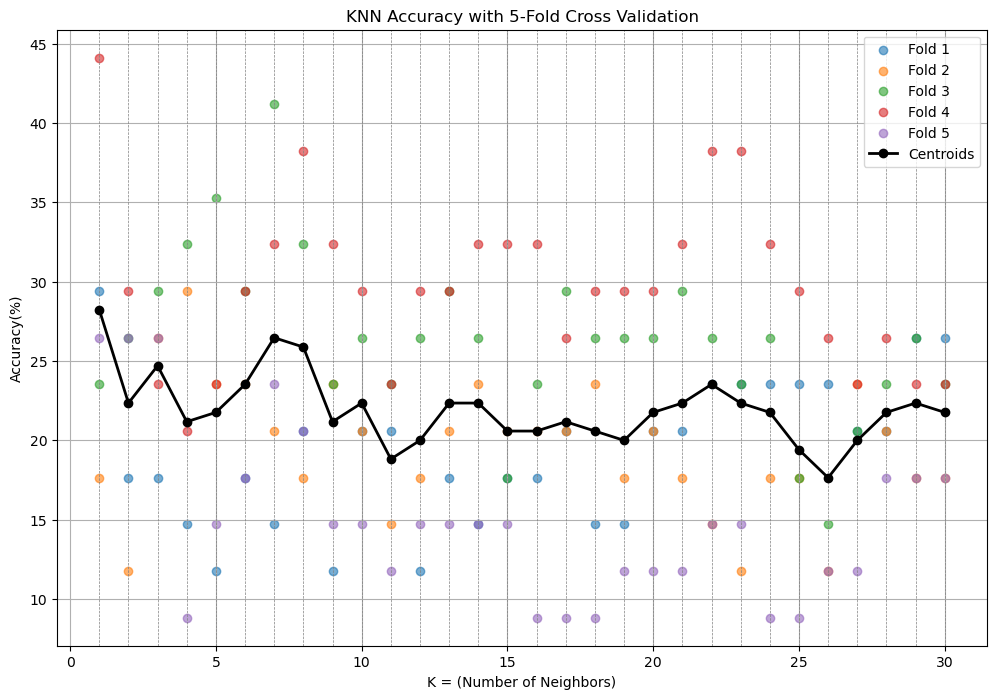

In [12]:
plt.figure(figsize=(12, 8))
K_values = list(range(1, 31))

colors = plt.cm.tab10.colors
for fold_idx,fold_acc in enumerate(zip(*foldAccuracies)):
    plt.scatter(K_values,fold_acc,color=colors[fold_idx % len(colors)], alpha=0.6, label=f'Fold {fold_idx + 1}')
    
for k in K_values:
    plt.axvline(x=k, color='gray', linestyle='--', linewidth=0.5)

plt.plot(K_values, avgAccuracy, color='black', marker='o', label='Centroids', linewidth=2)
plt.xlabel('K = (Number of Neighbors)')
plt.ylabel('Accuracy(%)')
plt.title('KNN Accuracy with 5-Fold Cross Validation')
plt.legend()
plt.grid()
plt.show()
